# My observations regarding these datasets would consist of the following:
#1.Mouse tumor volume increased with weight
#2.The tumor volume decreased as the timepoint increased
#3.The female mouse tumor volumes appears higher than that recorded for the males tumor volumes.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_path = "Pymaceuticals/data/Mouse_metadata.csv"
results_path = "Pymaceuticals/data/Study_results.csv"

In [3]:
mouse_read = pd.read_csv(mouse_path)
results_read = pd.read_csv(results_path)

In [4]:
mouse_read

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
results_read

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the data into a single dataset and display
combined = pd.merge(results_read,mouse_read, on = "Mouse ID")
combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice.
mice_ttl = len(combined["Mouse ID"].unique())
mice_ttl

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = combined.reset_index().groupby(["Mouse ID", "Timepoint"]).count()

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = dupe_mice.loc[dupe_mice["index"]>1]
dupe_data

index  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  \
Mouse ID Timepoint                                                              
g989     0              2                   2                 2             2   
         5              2                   2                 2             2   
         10             2                   2                 2             2   
         15             2                   2                 2             2   
         20             2                   2                 2             2   

                    Sex  Age_months  Weight (g)  
Mouse ID Timepoint                               
g989     0            2           2           2  
         5            2           2           2  
         10           2           2           2  
         15           2           2           2  
         20           2           2           2

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined.loc[combined["Mouse ID"]!= "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_df["Mouse ID"].unique())
clean_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor =clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standev_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summ_stats = pd.DataFrame({"Mean":mean_tumor, "Median":median_tumor,"Variance":variance_tumor,"Standard Deviation":standev_tumor, "SEM":sem_tumor})
summ_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_summ_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg (["mean", "median", "var", "std", "sem"])
agg_summ_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

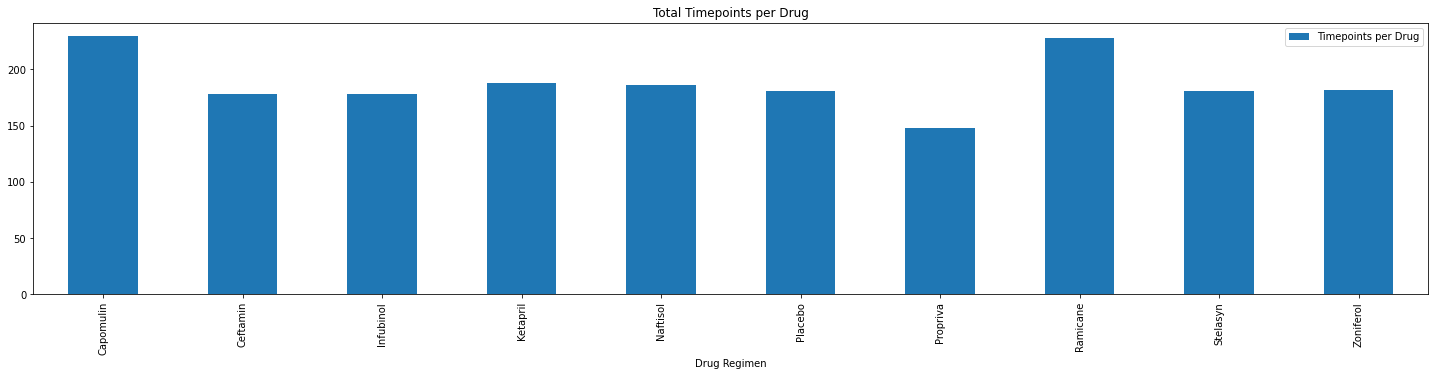

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
ttl_timepoints = (clean_df.groupby("Drug Regimen").count()).reset_index()
#ttl_timepoints
timepoint_per_drug = ttl_timepoints[['Drug Regimen', "Timepoint"]]
timepoint_per_drug = timepoint_per_drug.rename(columns={"Timepoint": "Timepoints per Drug"})
#timepoint_per_drug
timepoint_per_drug = timepoint_per_drug.set_index("Drug Regimen")
timepoint_per_drug.plot(kind="bar", figsize = (25,5))
plt.title("Total Timepoints per Drug")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

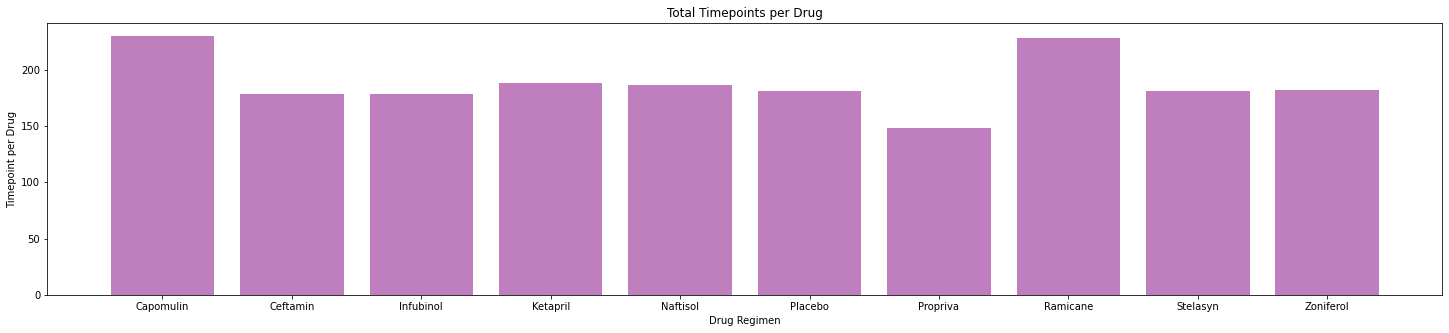

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
ttl_timepoints = ttl_timepoints[["Drug Regimen"]]
drug_regimen = ttl_timepoints["Drug Regimen"].tolist()
x_axis = drug_regimen
plt.figure(figsize=(25,5))
plt.bar(x_axis, timepoint_per_drug["Timepoints per Drug"], color= "purple", alpha= 0.5, align= "center")
plt.title("Total Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint per Drug")
plt.show

(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

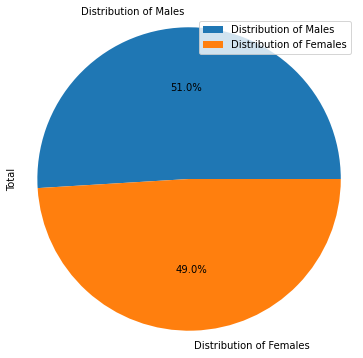

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = (clean_df.groupby("Sex").count()).reset_index()
#gender
mvf = gender[["Sex", "Mouse ID"]]
mvf = mvf.rename(columns={"Mouse ID":"Total"})
#mvf
mvf_df = pd.DataFrame({"Sex":["Male", "Female"], "Total":[958,922]},index=["Distribution of Males","Distribution of Females"])
#mvf_df
mvf_pie = mvf_df.plot.pie(autopct="%1.1f%%", y="Total", figsize = (6,6))
plt.axis("equal")

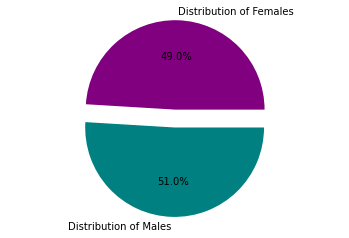

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = ["Distribution of Females","Distribution of Males"]
Totals = [922,958]
Colors = ["purple","teal"]
explode = [0.2,0]
plt.pie(Totals, explode=explode,labels=Gender, colors=Colors, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest    

final_tumor = clean_df.loc[clean_df["Timepoint"]==45]
#final_tumor
Capomulin_tumor = final_tumor.loc[(final_tumor["Drug Regimen"]=="Capomulin"),:]
Ramicane_tumor= final_tumor.loc[(final_tumor["Drug Regimen"]=="Ramicane"),:]
Infubinol_tumor= final_tumor.loc[(final_tumor["Drug Regimen"]=="Infubinol"),:]
Ceftamin_tumor= final_tumor.loc[(final_tumor["Drug Regimen"]=="Ceftamin"),:]


In [19]:
quartiles = Capomulin_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# first quartile
lowerq = quartiles[0.25]
# third quartile
upperq = quartiles[0.75]
# interquartile range
iqr = upperq-lowerq
# print our data
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")

The lower quartile of Volume is: 32.37735684
The upper quartile of Volume is: 40.1592203
The interquartile range of Volume is: 7.781863460000004
The the median of Volume is: 37.31184577 


In [20]:
# calc the lower bound
lower_bound = lowerq - (1.5*iqr)

# calc the upper bound
upper_bound = upperq + (1.5*iqr)

# print statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_vol = Capomulin_tumor.loc[(Capomulin_tumor["Tumor Volume (mm3)"]< lower_bound)|(Capomulin_tumor["Tumor Volume (mm3)"]>upper_bound)]
outlier_vol

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


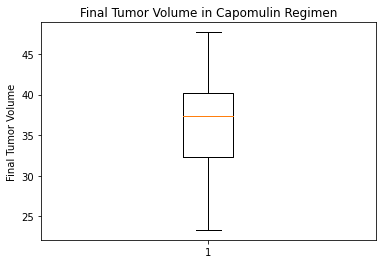

In [21]:
vol= Capomulin_tumor["Tumor Volume (mm3)"]
# creating subplot (draw a figure)
fig1, ax1 = plt.subplots()

# 'adding' stuff to ax1
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(vol)
plt.show()


In [22]:
quartiles = Ramicane_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# first quartile
lowerq = quartiles[0.25]
# third quartile
upperq = quartiles[0.75]
# interquartile range
iqr = upperq-lowerq
# print our data
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")
# calc the lower bound
lower_bound = lowerq - (1.5*iqr)

# calc the upper bound
upper_bound = upperq + (1.5*iqr)

# print statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_vol = Ramicane_tumor.loc[(Ramicane_tumor["Tumor Volume (mm3)"]< lower_bound)|(Ramicane_tumor["Tumor Volume (mm3)"]>upper_bound)]
outlier_vol

The lower quartile of Volume is: 30.981175225
The upper quartile of Volume is: 38.5083053075
The interquartile range of Volume is: 7.527130082500001
The the median of Volume is: 34.848627300000004 
Values below 19.69048010125 could be outliers.
Values above 49.79900043125001 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


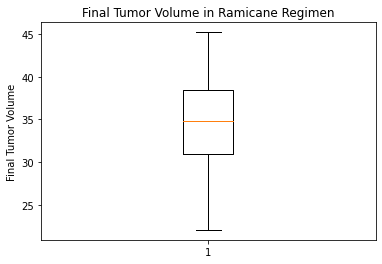

In [23]:
vol= Ramicane_tumor["Tumor Volume (mm3)"]
# creating subplot (draw a figure)
fig1, ax1 = plt.subplots()

# 'adding' stuff to ax1
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(vol)
plt.show()

In [24]:
quartiles = Infubinol_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# first quartile
lowerq = quartiles[0.25]
# third quartile
upperq = quartiles[0.75]
# interquartile range
iqr = upperq-lowerq
# print our data
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")
# calc the lower bound
lower_bound = lowerq - (1.5*iqr)

# calc the upper bound
upper_bound = upperq + (1.5*iqr)

# print statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_vol = Infubinol_tumor.loc[(Infubinol_tumor["Tumor Volume (mm3)"]< lower_bound)|(Infubinol_tumor["Tumor Volume (mm3)"]>upper_bound)]
outlier_vol

The lower quartile of Volume is: 62.75445141
The upper quartile of Volume is: 67.68556862
The interquartile range of Volume is: 4.9311172099999965
The the median of Volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


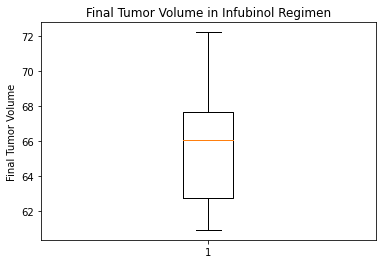

In [25]:
vol= Infubinol_tumor["Tumor Volume (mm3)"]
# creating subplot (draw a figure)
fig1, ax1 = plt.subplots()

# 'adding' stuff to ax1
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(vol)
plt.show()

In [26]:
quartiles = Ceftamin_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# first quartile
lowerq = quartiles[0.25]
# third quartile
upperq = quartiles[0.75]
# interquartile range
iqr = upperq-lowerq
# print our data
print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of Volume is: {quartiles[0.5]} ")
# calc the lower bound
lower_bound = lowerq - (1.5*iqr)

# calc the upper bound
upper_bound = upperq + (1.5*iqr)

# print statements
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_vol = Ceftamin_tumor.loc[(Ceftamin_tumor["Tumor Volume (mm3)"]< lower_bound)|(Ceftamin_tumor["Tumor Volume (mm3)"]>upper_bound)]
outlier_vol

The lower quartile of Volume is: 61.43389223
The upper quartile of Volume is: 67.52748237
The interquartile range of Volume is: 6.093590140000003
The the median of Volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


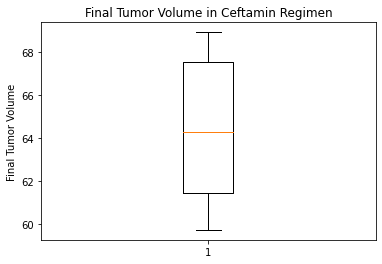

In [27]:
vol= Ceftamin_tumor["Tumor Volume (mm3)"]
# creating subplot (draw a figure)
fig1, ax1 = plt.subplots()

# 'adding' stuff to ax1
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(vol)
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin for one mouse
tv_tp = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
tv_tp 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
mouse_b128 = tv_tp.loc[tv_tp["Mouse ID"]=="b128"]
mouse_b128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


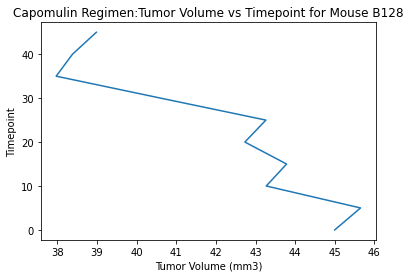

In [30]:
mouse_b128_tv = mouse_b128["Tumor Volume (mm3)"]
mouse_b128_tp = mouse_b128["Timepoint"]
plt.plot(mouse_b128_tv,mouse_b128_tp)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title('Capomulin Regimen:Tumor Volume vs Timepoint for Mouse B128')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

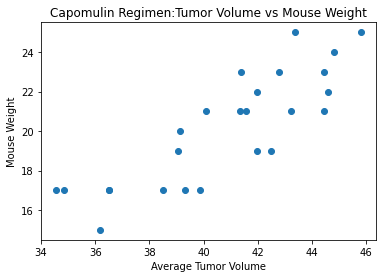

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tv = tv_tp.groupby(tv_tp["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = tv_tp.groupby(tv_tp["Mouse ID"])["Weight (g)"].mean()
plt.scatter(average_tv,mouse_weight)
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
plt.title('Capomulin Regimen:Tumor Volume vs Mouse Weight')
plt.show

## Correlation and Regression

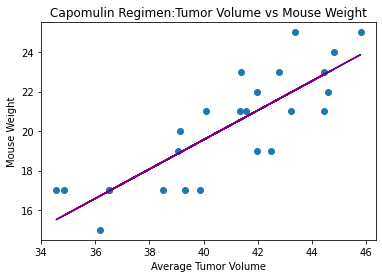

The correlation between both factors is 0.84


In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
regress_values = st.linregress(average_tv, mouse_weight)
#y=mx+b
y_values= average_tv * regress_values[0] + regress_values[1]
plt.scatter(average_tv,mouse_weight)
plt.plot(average_tv,y_values, color="purple")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
plt.title('Capomulin Regimen:Tumor Volume vs Mouse Weight')
plt.show()
correlation = st.pearsonr(average_tv,mouse_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")